## Lab Week 14: FFT analysis, continued; music & expectation

### 29 January 2018

# Goals #

In this lab, you should be able to:
* Gain practice reasoning about perceived sound from spectograms
* Use FFT with ease to compute pitch information for an audio signal
* Reason about how music affects you when it satisfies or breaks your schematic expectations

# 0.1 Are you still set up to use Jupyter & Python?

Don't forget that you'll need the Lab Bundle installed in order to do this lab. To use the lab computers, you'll just need to do this once, and it will be installed for your account no matter which machine you use. 

The easy way to check if your installation is correct is to check whether your Notebook can find the `play` command: 

In [1]:
?play

Executing the line above should pop up an information window at the bottom of your screen. If instead you get the message __Object play not found__, then you need to follow the instructions to install the lab bundle on learn.gold: https://learn.gold.ac.uk/mod/resource/view.php?id=482072


# 0.2. Are you caught up on labs?

By now, you should find it easy to:

1. Synthesize a sine wave with an arbitrary amplitude, frequency, and phase offset, then play that wave back. If you don't know how to to this, revisit week 2.
2. Compute and plot an FFT of an arbitrary 1-dimensional signal (e.g. an audio wave). If you don't know how to do this, make sure you've worked through week 3.

# Part 1: Spectogram forensics

Grab a PDF showing three pairs of waveforms and spectograms from http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/worksheet_spectra.pdf. For each one, work with a small group to come up with a proposal for what each sound will sound like, and what you believe is the source of the sound.

Questions you might consider:
* Is the sound pitched or unpitched?
* How does the sound change in pitch or volume over time?
* Is it a real-world sound or is it synthesised?
* How many sounds will you hear? How does this change over time?
* Does the sound have a musical rhythm or meter? (e.g., is there a pattern to when events happen over time, or to how loud they are over time?)
* Might it be a musical instrument, speech, singing, a sound in nature, ... ?

Record your reasoning in the space below, using markdown.

<b>Sound A</b>
I can see that there are 5 clearly separate sonic events.
The attacks of each sound appear to have a fairly even distribution of frequencies, which decay into a distribution containing less high frequencies. Relative to the rest of the spectrum, the body of each of the sounds has a more intense low frequency content.  

Due to the spacing of the individual sounds, repeating spectral pattern and the richness of the overall spectrum, I would guess that this sound file is of birdsong. 

<b>Sound B</b>
With this sound, you can see 8 sharply defined transients, with 2 that have a particularly high amplitude in the time domain visualisation. In the spectrum, you can see that the energy is focused at the lower frequency ranges. The frequencies gradually fade in intensity in the upper ranges. You can also see that there is a lot of noise in the spectrum in the higher frequencies. The repetitive nature of the spectrum indicates to me that the audio is of a drum beat, although it could also be some mechanical non-musical source. The sharp cuts in the spectrum also makes me think that the audio has been either digitally manipulated, or tape-spliced.

<b>Sound C</b>
This sound file is similar to Sound B in the sense that there is an aspect of rhythmic transients to it. With this example there is a very even distribution of spectral energy from 0hz to 16kHz. The spectrum is very dense over time, despite the time domain visualisation showing more gaps between the transients. I think the complexity of the spectrum and how chaotic it appears in comparison to Sound B, indicates that the sound may be something naturally occuring, such as some form of industrial noise or environmental sounds. It does not seem musical to me,  although it could also be some form of percussive instrument.




# Part 2: Frequency Analysis Using the FFT #

a. Download the following audio files to your machine (e.g., by right-clicking or control-clicking): 

* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/file1.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/file2.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/file3.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/file4.wav

b. Load each file into an array variable using the following syntax: 
*(You will have to use a different path on your machine)*

In [2]:
#Something like this
file1 = wavReadMono("/Users/Koishi/PMCLabs/file1.wav")
file2 = wavReadMono("/Users/Koishi/PMCLabs/file2.wav")
file3 = wavReadMono("/Users/Koishi/PMCLabs/file3.wav")
file4 = wavReadMono("/Users/Koishi/PMCLabs/file4.wav")

c. Knowing that the sample rate for these files is 44100Hz, use the FFT and related techniques from last week's lab to answer the following questions:

#### 1. file1.wav contains a single sine wave. What frequency is it? ####

Hint 1: Remember you can use the `fft.fftfreq` function to get the frequencies associated with each FFT bin (see last week's lab, or type `?fft.fftfreq` for more information).

Hint 2: You can use the `argmax()` function to find the index of the maximum element in an array. Type `?argmax` for more information.

3538


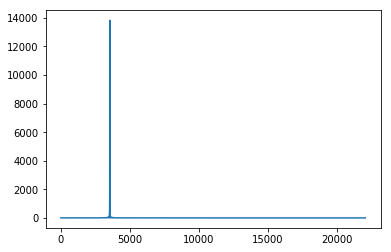

In [38]:
file = file1

spec = fft.fft(file, size(file))
magspec = abs(spec)
plot(magspec[0:22050])
print(argmax(magspec[0:22050]))


# The frequency is 3538Hz

#### 2. file2.wav contains a square wave. What is its fundamental frequency? ####

947


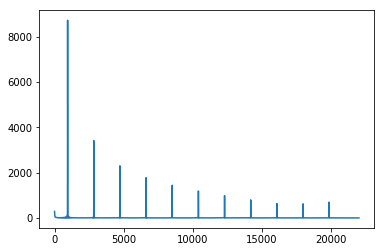

In [41]:
file = file2

spec = fft.fft(file, size(file))
magspec = abs(spec)
plot(magspec[0:22050])
print(argmax(magspec[0:22050]))

# The fundamental frequency is 947Hz

#### 3. file3.wav contains two sine tones. What frequencies are they? ####

In [139]:
file = file3

spec = fft.fft(file, size(file))
magspec = abs(spec)
sine1 = argmax(magspec[0:22050]) 
print(sine1) # 1010Hz
magspec2 = argmax(magspec[sine1+1:22050]) # 403Hz
sine2 = sine1 + magspec2 #(1010Hz + 403Hz)
print(sine2) #1413Hz

# The fundamental frequency of the two sine waves are 1010Hz and 1413Hz

1010
1413


#### 4. Optional (advanced): Real-world voice analysis

file4.wav contains two spoken vowels. Try using Python to do some preliminary analysis, using both the time-domain signal (i.e., the waveform) and the FFT. For instance:
* What is the fundamental frequency of these vowels?
* At what time does the second vowel begin to be spoken?
* How might you computationally determine which vowels are spoken?

Hints:
* Don't forget that you can take the FFT of the whole file, or take the FFT of a smaller segment of the file. (Or, you could take the FFT of smaller segments at different timepoints!)
* You may want to read about formant frequencies at https://en.wikipedia.org/wiki/Formant

1222
608
2.0174829932


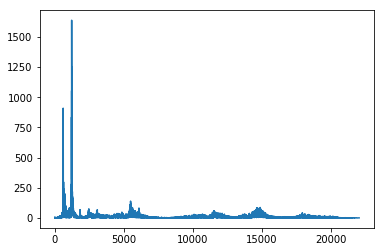

In [200]:
file = file4

spec = fft.fft(file, size(file))
magspec = abs(spec)
plot(magspec[0:22050])

peak1 = argmax(magspec[0:22050])
print(peak1)

offset = 7
peak2 = argmax(magspec[0:peak1-offset])
print(peak2)

print(argmax(file) / 44100) # calculate where the second vowel occurs

play(file4)

# I would guess that the fundamental of the 'A' vowel is 608Hz and the fundamental of the 'E' vowel is 1222Hz
# The second vowel sound occurs 2.017 seconds into the file, which can be easily determined due to the fact that this
# is also the peak frequency of the file

# You may be able to computationally determine which vowel is spoken by comparing it to a table of formant 
# frequencies and matching it to the closest value



# Part 3: Musical expectation

Choose a recording of a piece of music from YouTube, Spotify, or SoundCloud. Listen to it and respond to the following prompts:

1. Provide a URL or other identifying information for the song, so we can find exactly the same version as you.
1. Name three things this piece of music does to satisfy schematic musical expectations over time, along with the timepoint of each one. That is, you should name three things it does which are typical of music of this genre. This could be the way one melody note follows another, the way a harmonic sequence unfolds, the way a rhythmic section is played, or something else. (Use specific music theory terminology if you can, but otherwise just describe what you hear as precisely as you're able.)
1. Name one or two things this music does that is surprising in light of schematic musical expectations, along with the timepoint(s). Also describe the effect this has on you, personally, as a listener. 
1. In addition to breaking your expectations at some points, does the music do anything else to increase or maintain arousal or attention? This could relate to the tempo/speed, volume, instrumentation/timbre, or any number of other things.

In [143]:
1.
https://www.youtube.com/watch?v=_53J5VS_guk

2.
This piece of music combines the genres of drone and harsh noise.

The track focuses on long, sustained tones, which is characteristic of drone music, while
unlike most drone music which focuses more on resonances and softer timbres, the timbre in this
piece of music is intentionally harsh and abrasive, bringing it more in line with noise music.

In terms of dynamics and structure, the piece is constantly dense across almost 20 minutes of
duration, which is a theme common to most drone and noise music.

There is an aspect of minimalism and simplicity to the track that is also a trait of drone and
noise music. There are few sonic elements to it unlike most other stylesof music, just
layers of distorted synthesizer drones and feedback.

3.
The layers of feedback at timepoints like 07:58 and 12:34 are particularly beautiful to me
in how they contrast with the harshness of the music in general. These moments are
uncharacteristically harmonic for a lot of noise music, which is where the drone influence
of the track shows through. I think it works amazingly in adding emotional effect to the piece
due to the previously mentioned contrast, as well as how I find that it forms an overarching
narrative in terms of developing from a starkly harsh opening, to the more harmonious 
feedback drones starting to bleed through the mix. 

4. Drone music tends to be a style that focuses on very slow evolution over time, so for me
the aspect of keeping interest over time when this piece of music is concerned, would be
in the subtle shifts of timbre and texture that occur across the composition. For me,
the track is so rich and dense that it has a very hypnotic effect that keeps my interest 
throughout its duration, in addition to the emotional impact mentioned in the previous point.

    

SyntaxError: invalid syntax (<ipython-input-143-044ad7b52df9>, line 2)